<a href="https://colab.research.google.com/github/amithrx/Live-Pose-estimation-using-Google-Mediapipe-and-Various-ML-algorithms/blob/main/Pose_CNN_(Along_with_Hyperparameter_tunings).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
import os 

In [ ]:
!pip install keras_tuner
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 6.4 MB/s 


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
# downloaded1 = drive.CreateFile({'id':"13NkbScVe7i0Hegj1Q-1cGOHr0V7CGnua"})   # replace the id with id of file you want to access
downloaded1 = drive.CreateFile({'id':"1rddzkvF88xQEzMWnGEoR_zbXQejHoAdv"})   # replace the id with id of file you want to access
downloaded1.GetContentFile('finalcut.csv')

In [ ]:
# reading raw data file
#columns = ['x-axis', 'y-axis', 'z-axis', 'timestamp', 'activity']
df_har = pd.read_csv("finalcut.csv", header = None)
df_har


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,nose_x,l_shouldr_x,r_shoulder_x,l_elbow_x,r_elbow_x,l_wrist_x,r_wrist_x,l_hip_x,r_hip_x,l_knee_x,...,r_elbow_z,l_wrist_z,r_wrist_z,l_hip_z,r_hip_z,l_knee_z,r_knee_z,l_ankle_z,r_ankle_z,Output
1,0.466836989,0.536425471,0.421737492,0.552586377,0.400636822,0.554411948,0.395507991,0.511357903,0.443766415,0.519800663,...,-0.127180368,-0.253910035,-0.229280859,-0.00820767,0.008048343,0.075822279,0.088045202,0.28819102,0.313930452,2
2,0.466981173,0.534423232,0.419800907,0.552579224,0.398616493,0.550638914,0.395376265,0.51000458,0.442397594,0.518164456,...,-0.134703189,-0.2186542,-0.265969336,-0.006716055,0.006530192,0.065338001,0.060155779,0.251547188,0.270694315,2
3,0.44387275,0.510528922,0.39275986,0.538784623,0.373896241,0.515839875,0.406628519,0.494533837,0.429210663,0.511657953,...,-0.233621523,-0.306831658,-0.44258517,-0.004903356,0.004764312,0.022069298,0.015744209,0.255176365,0.251044512,2
4,0.464225858,0.529767096,0.413535655,0.5512923,0.381715655,0.495894909,0.386194438,0.497234821,0.429964721,0.494289339,...,0.010997185,-0.524008512,-0.154198542,-0.020188037,0.020177683,-0.029583782,-0.306580335,0.362366378,-0.018393395,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,0.410130262,0.470612764,0.353161514,0.481383622,0.346614212,0.484839678,0.346404254,0.446524382,0.382068634,0.442739815,...,-0.047307201,-0.20736447,-0.169882715,-0.009812003,0.009730845,-0.016656373,0.036118161,0.248286009,0.303717762,1
3809,0.413310617,0.471635044,0.354795247,0.481459528,0.34364754,0.488360822,0.344700277,0.447434902,0.384895116,0.442575783,...,-0.14865613,-0.192228019,-0.25464493,-0.000278628,0.00014017,-0.016059125,-0.000954395,0.230153367,0.250322253,1
3810,0.425183952,0.478965431,0.361634165,0.487567008,0.350379795,0.493800342,0.350503743,0.453244925,0.391087115,0.453847826,...,-0.069936648,-0.114805818,-0.167545915,0.005705269,-0.005720128,-0.020812653,-0.015095033,0.213164449,0.20433481,1
3811,0.424494207,0.479368269,0.360941797,0.486462504,0.352958918,0.491775751,0.352376729,0.454283655,0.392247468,0.451816946,...,-0.05203687,-0.222686455,-0.166772068,-0.00548711,0.005477537,0.011075634,0.045946468,0.289274305,0.309554756,1


In [ ]:
df_har.iloc[0]

0           nose_x
1      l_shouldr_x
2     r_shoulder_x
3        l_elbow_x
4        r_elbow_x
5        l_wrist_x
6        r_wrist_x
7          l_hip_x
8          r_hip_x
9         l_knee_x
10        r_knee_x
11       l_ankle_x
12       r_ankle_x
13          nose_y
14     l_shouldr_y
15    r_shoulder_y
16       l_elbow_y
17       r_elbow_y
18       l_wrist_y
19       r_wrist_y
20         l_hip_y
21         r_hip_y
22        l_knee_y
23        r_knee_y
24       l_ankle_y
25       r_ankle_y
26          nose_z
27     l_shouldr_z
28    r_shoulder_z
29       l_elbow_z
30       r_elbow_z
31       l_wrist_z
32       r_wrist_z
33         l_hip_z
34         r_hip_z
35        l_knee_z
36        r_knee_z
37       l_ankle_z
38       r_ankle_z
39          Output
Name: 0, dtype: object

In [ ]:
# Remove the first row
#df_har.drop(0, axis= 0, inplace=True)
#df_har


# remove the first three columns and first row
df = df_har.iloc[1: ,]
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1,0.466836989,0.536425471,0.421737492,0.552586377,0.400636822,0.554411948,0.395507991,0.511357903,0.443766415,0.519800663,...,-0.127180368,-0.253910035,-0.229280859,-0.00820767,0.008048343,0.075822279,0.088045202,0.28819102,0.313930452,2
2,0.466981173,0.534423232,0.419800907,0.552579224,0.398616493,0.550638914,0.395376265,0.51000458,0.442397594,0.518164456,...,-0.134703189,-0.2186542,-0.265969336,-0.006716055,0.006530192,0.065338001,0.060155779,0.251547188,0.270694315,2
3,0.44387275,0.510528922,0.39275986,0.538784623,0.373896241,0.515839875,0.406628519,0.494533837,0.429210663,0.511657953,...,-0.233621523,-0.306831658,-0.44258517,-0.004903356,0.004764312,0.022069298,0.015744209,0.255176365,0.251044512,2
4,0.464225858,0.529767096,0.413535655,0.5512923,0.381715655,0.495894909,0.386194438,0.497234821,0.429964721,0.494289339,...,0.010997185,-0.524008512,-0.154198542,-0.020188037,0.020177683,-0.029583782,-0.306580335,0.362366378,-0.018393395,2
5,0.46530968,0.522170603,0.403040707,0.550458789,0.370451242,0.514875591,0.409228981,0.499619335,0.430802643,0.508876383,...,-0.268270254,-0.437282801,-0.568175673,-0.0045435,0.004420654,-0.118991815,0.038211673,0.202935129,0.369386941,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,0.410130262,0.470612764,0.353161514,0.481383622,0.346614212,0.484839678,0.346404254,0.446524382,0.382068634,0.442739815,...,-0.047307201,-0.20736447,-0.169882715,-0.009812003,0.009730845,-0.016656373,0.036118161,0.248286009,0.303717762,1
3809,0.413310617,0.471635044,0.354795247,0.481459528,0.34364754,0.488360822,0.344700277,0.447434902,0.384895116,0.442575783,...,-0.14865613,-0.192228019,-0.25464493,-0.000278628,0.00014017,-0.016059125,-0.000954395,0.230153367,0.250322253,1
3810,0.425183952,0.478965431,0.361634165,0.487567008,0.350379795,0.493800342,0.350503743,0.453244925,0.391087115,0.453847826,...,-0.069936648,-0.114805818,-0.167545915,0.005705269,-0.005720128,-0.020812653,-0.015095033,0.213164449,0.20433481,1
3811,0.424494207,0.479368269,0.360941797,0.486462504,0.352958918,0.491775751,0.352376729,0.454283655,0.392247468,0.451816946,...,-0.05203687,-0.222686455,-0.166772068,-0.00548711,0.005477537,0.011075634,0.045946468,0.289274305,0.309554756,1


In [ ]:
df.columns = ['nose_x','l_shouldr_x','r_shoulder_x','l_elbow_x','r_elbow_x','l_wrist_x','r_wrist_x',
          'l_hip_x','r_hip_x','l_knee_x','r_knee_x','l_ankle_x','r_ankle_x','nose_y','l_shouldr_y',
          'r_shoulder_y','l_elbow_y','r_elbow_y','l_wrist_y','r_wrist_y','l_hip_y','r_hip_y','l_knee_y',
          'r_knee_y','l_ankle_y','r_ankle_y','nose_z','l_shouldr_z','r_shoulder_z','l_elbow_z','r_elbow_z',
          'l_wrist_z','r_wrist_z','l_hip_z','r_hip_z','l_knee_z','r_knee_z','l_ankle_z','r_ankle_z','Output']
df

,nose_x,l_shouldr_x,r_shoulder_x,l_elbow_x,r_elbow_x,l_wrist_x,r_wrist_x,l_hip_x,r_hip_x,l_knee_x,...,r_elbow_z,l_wrist_z,r_wrist_z,l_hip_z,r_hip_z,l_knee_z,r_knee_z,l_ankle_z,r_ankle_z,Output
1,0.466836989,0.536425471,0.421737492,0.552586377,0.400636822,0.554411948,0.395507991,0.511357903,0.443766415,0.519800663,...,-0.127180368,-0.253910035,-0.229280859,-0.00820767,0.008048343,0.075822279,0.088045202,0.28819102,0.313930452,2
2,0.466981173,0.534423232,0.419800907,0.552579224,0.398616493,0.550638914,0.395376265,0.51000458,0.442397594,0.518164456,...,-0.134703189,-0.2186542,-0.265969336,-0.006716055,0.006530192,0.065338001,0.060155779,0.251547188,0.270694315,2
3,0.44387275,0.510528922,0.39275986,0.538784623,0.373896241,0.515839875,0.406628519,0.494533837,0.429210663,0.511657953,...,-0.233621523,-0.306831658,-0.44258517,-0.004903356,0.004764312,0.022069298,0.015744209,0.255176365,0.251044512,2
4,0.464225858,0.529767096,0.413535655,0.5512923,0.381715655,0.495894909,0.386194438,0.497234821,0.429964721,0.494289339,...,0.010997185,-0.524008512,-0.154198542,-0.020188037,0.020177683,-0.029583782,-0.306580335,0.362366378,-0.018393395,2
5,0.46530968,0.522170603,0.403040707,0.550458789,0.370451242,0.514875591,0.409228981,0.499619335,0.430802643,0.508876383,...,-0.268270254,-0.437282801,-0.568175673,-0.0045435,0.004420654,-0.118991815,0.038211673,0.202935129,0.369386941,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,0.410130262,0.470612764,0.353161514,0.481383622,0.346614212,0.484839678,0.346404254,0.446524382,0.382068634,0.442739815,...,-0.047307201,-0.20736447,-0.169882715,-0.009812003,0.009730845,-0.016656373,0.036118161,0.248286009,0.303717762,1
3809,0.413310617,0.471635044,0.354795247,0.481459528,0.34364754,0.488360822,0.344700277,0.447434902,0.384895116,0.442575783,...,-0.14865613,-0.192228019,-0.25464493,-0.000278628,0.00014017,-0.016059125,-0.000954395,0.230153367,0.250322253,1
3810,0.425183952,0.478965431,0.361634165,0.487567008,0.350379795,0.493800342,0.350503743,0.453244925,0.391087115,0.453847826,...,-0.069936648,-0.114805818,-0.167545915,0.005705269,-0.005720128,-0.020812653,-0.015095033,0.213164449,0.20433481,1
3811,0.424494207,0.479368269,0.360941797,0.486462504,0.352958918,0.491775751,0.352376729,0.454283655,0.392247468,0.451816946,...,-0.05203687,-0.222686455,-0.166772068,-0.00548711,0.005477537,0.011075634,0.045946468,0.289274305,0.309554756,1


In [ ]:
# removing null values
df = df.dropna()
df.shape

(3812, 40)

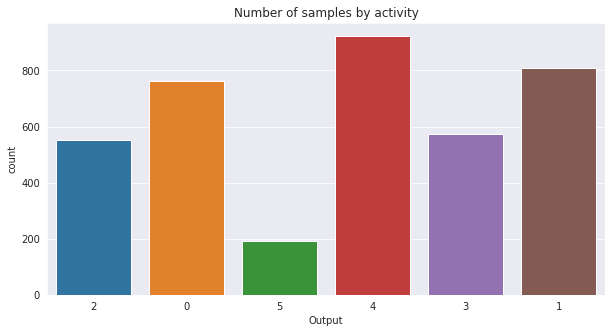

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = "Output", data = df)
plt.title("Number of samples by activity")
plt.show()

In [ ]:
activities = df['Output'].value_counts().index
activities


Index(['4', '1', '0', '3', '2', '5'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['label'] = label.fit_transform(df['Output'])
df


,nose_x,l_shouldr_x,r_shoulder_x,l_elbow_x,r_elbow_x,l_wrist_x,r_wrist_x,l_hip_x,r_hip_x,l_knee_x,...,l_wrist_z,r_wrist_z,l_hip_z,r_hip_z,l_knee_z,r_knee_z,l_ankle_z,r_ankle_z,Output,label
1,0.466836989,0.536425471,0.421737492,0.552586377,0.400636822,0.554411948,0.395507991,0.511357903,0.443766415,0.519800663,...,-0.253910035,-0.229280859,-0.00820767,0.008048343,0.075822279,0.088045202,0.28819102,0.313930452,2,2
2,0.466981173,0.534423232,0.419800907,0.552579224,0.398616493,0.550638914,0.395376265,0.51000458,0.442397594,0.518164456,...,-0.2186542,-0.265969336,-0.006716055,0.006530192,0.065338001,0.060155779,0.251547188,0.270694315,2,2
3,0.44387275,0.510528922,0.39275986,0.538784623,0.373896241,0.515839875,0.406628519,0.494533837,0.429210663,0.511657953,...,-0.306831658,-0.44258517,-0.004903356,0.004764312,0.022069298,0.015744209,0.255176365,0.251044512,2,2
4,0.464225858,0.529767096,0.413535655,0.5512923,0.381715655,0.495894909,0.386194438,0.497234821,0.429964721,0.494289339,...,-0.524008512,-0.154198542,-0.020188037,0.020177683,-0.029583782,-0.306580335,0.362366378,-0.018393395,2,2
5,0.46530968,0.522170603,0.403040707,0.550458789,0.370451242,0.514875591,0.409228981,0.499619335,0.430802643,0.508876383,...,-0.437282801,-0.568175673,-0.0045435,0.004420654,-0.118991815,0.038211673,0.202935129,0.369386941,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,0.410130262,0.470612764,0.353161514,0.481383622,0.346614212,0.484839678,0.346404254,0.446524382,0.382068634,0.442739815,...,-0.20736447,-0.169882715,-0.009812003,0.009730845,-0.016656373,0.036118161,0.248286009,0.303717762,1,1
3809,0.413310617,0.471635044,0.354795247,0.481459528,0.34364754,0.488360822,0.344700277,0.447434902,0.384895116,0.442575783,...,-0.192228019,-0.25464493,-0.000278628,0.00014017,-0.016059125,-0.000954395,0.230153367,0.250322253,1,1
3810,0.425183952,0.478965431,0.361634165,0.487567008,0.350379795,0.493800342,0.350503743,0.453244925,0.391087115,0.453847826,...,-0.114805818,-0.167545915,0.005705269,-0.005720128,-0.020812653,-0.015095033,0.213164449,0.20433481,1,1
3811,0.424494207,0.479368269,0.360941797,0.486462504,0.352958918,0.491775751,0.352376729,0.454283655,0.392247468,0.451816946,...,-0.222686455,-0.166772068,-0.00548711,0.005477537,0.011075634,0.045946468,0.289274305,0.309554756,1,1


# Frame Preparation

In [ ]:
df.drop(['Output'], axis=1, inplace=True)

In [ ]:
df=df.astype(float)

In [ ]:
df.dtypes

nose_x          float64
l_shouldr_x     float64
r_shoulder_x    float64
l_elbow_x       float64
r_elbow_x       float64
l_wrist_x       float64
r_wrist_x       float64
l_hip_x         float64
r_hip_x         float64
l_knee_x        float64
r_knee_x        float64
l_ankle_x       float64
r_ankle_x       float64
nose_y          float64
l_shouldr_y     float64
r_shoulder_y    float64
l_elbow_y       float64
r_elbow_y       float64
l_wrist_y       float64
r_wrist_y       float64
l_hip_y         float64
r_hip_y         float64
l_knee_y        float64
r_knee_y        float64
l_ankle_y       float64
r_ankle_y       float64
nose_z          float64
l_shouldr_z     float64
r_shoulder_z    float64
l_elbow_z       float64
r_elbow_z       float64
l_wrist_z       float64
r_wrist_z       float64
l_hip_z         float64
r_hip_z         float64
l_knee_z        float64
r_knee_z        float64
l_ankle_z       float64
r_ankle_z       float64
label           float64
dtype: object

In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 50
frame_size = 6
hop_size = 1

In [ ]:
def get_windows(df, frame_size, hop_size):

    N_FEATURES = 39

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        aA = df['nose_x'].values[i: i + frame_size]
        aB = df['l_shouldr_x'].values[i: i + frame_size]
        aC = df['r_shoulder_x'].values[i: i + frame_size]
        aD = df['l_elbow_x'].values[i: i + frame_size]
        aE = df['r_elbow_x'].values[i: i + frame_size]
        aF = df['l_wrist_x'].values[i: i + frame_size]
        aG = df['r_wrist_x'].values[i: i + frame_size]
        aH = df['l_hip_x'].values[i: i + frame_size]
        aI = df['r_hip_x'].values[i: i + frame_size]
        aJ = df['l_knee_x'].values[i: i + frame_size]
        aK = df['r_knee_x'].values[i: i + frame_size]
        aL = df['l_ankle_x'].values[i: i + frame_size]
        aM = df['r_ankle_x'].values[i: i + frame_size]
        aN = df['nose_y'].values[i: i + frame_size]
        aO = df['l_shouldr_y'].values[i: i + frame_size]
        aP = df['r_shoulder_y'].values[i: i + frame_size]
        aQ = df['l_elbow_y'].values[i: i + frame_size]
        aR = df['r_elbow_y'].values[i: i + frame_size]
        aS = df['l_wrist_y'].values[i: i + frame_size]
        aT = df['r_wrist_y'].values[i: i + frame_size]
        aU = df['l_hip_y'].values[i: i + frame_size]
        aV = df['r_hip_y'].values[i: i + frame_size]
        aW = df['l_knee_y'].values[i: i + frame_size]
        aX = df['r_knee_y'].values[i: i + frame_size]
        aY = df['l_ankle_y'].values[i: i + frame_size]
        aZ = df['r_ankle_y'].values[i: i + frame_size]
        bA = df['nose_z'].values[i: i + frame_size]
        bB = df['l_shouldr_z'].values[i: i + frame_size]
        bC = df['r_shoulder_z'].values[i: i + frame_size]
        bD = df['l_elbow_z'].values[i: i + frame_size]
        bE = df['r_elbow_z'].values[i: i + frame_size]
        bF = df['l_wrist_z'].values[i: i + frame_size]
        bG = df['r_wrist_z'].values[i: i + frame_size]
        bH = df['l_hip_z'].values[i: i + frame_size]
        bI = df['r_hip_z'].values[i: i + frame_size]
        bJ = df['l_knee_z'].values[i: i + frame_size]
        bK = df['r_knee_z'].values[i: i + frame_size]
        bL = df['l_ankle_z'].values[i: i + frame_size]
        bM = df['r_ankle_z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([aA, aB, aC, aD, aE, aF, aG, aH, aI, aJ, aK, aL, aM, aN, aO, aP, aQ, aR, aS, aT, aU, aV, aW, aX, aY, aZ, bA, bB, bC, bD, bE, bF, bG, bH, bI, bJ, bK, bL, bM])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [ ]:
X, y = get_windows(df, frame_size, hop_size)

In [ ]:
df.dtypes

nose_x          float64
l_shouldr_x     float64
r_shoulder_x    float64
l_elbow_x       float64
r_elbow_x       float64
l_wrist_x       float64
r_wrist_x       float64
l_hip_x         float64
r_hip_x         float64
l_knee_x        float64
r_knee_x        float64
l_ankle_x       float64
r_ankle_x       float64
nose_y          float64
l_shouldr_y     float64
r_shoulder_y    float64
l_elbow_y       float64
r_elbow_y       float64
l_wrist_y       float64
r_wrist_y       float64
l_hip_y         float64
r_hip_y         float64
l_knee_y        float64
r_knee_y        float64
l_ankle_y       float64
r_ankle_y       float64
nose_z          float64
l_shouldr_z     float64
r_shoulder_z    float64
l_elbow_z       float64
r_elbow_z       float64
l_wrist_z       float64
r_wrist_z       float64
l_hip_z         float64
r_hip_z         float64
l_knee_z        float64
r_knee_z        float64
l_ankle_z       float64
r_ankle_z       float64
label           float64
dtype: object

In [ ]:
X.shape, y.shape

((3806, 6, 39), (3806,))

In [ ]:
X

array([[[ 0.46683699,  0.46698117,  0.44387275, ...,  0.39550799,
          0.39537627,  0.40662852],
        [ 0.38619444,  0.40922898,  0.38588965, ...,  0.42773223,
          0.44640669,  0.43202224],
        [ 0.12364558,  0.11725052,  0.11981739, ...,  0.42785987,
          0.42614666,  0.365944  ],
        [ 0.37724251,  0.29704192,  0.3552956 , ...,  0.6846683 ,
          0.70797843,  0.69003618],
        [-0.39526755, -0.3458443 , -0.44058686, ..., -0.22928086,
         -0.26596934, -0.44258517],
        [-0.15419854, -0.56817567, -0.11683458, ..., -0.01839339,
          0.36938694,  0.02450635]],

       [[ 0.46698117,  0.44387275,  0.46422586, ...,  0.39537627,
          0.40662852,  0.38619444],
        [ 0.40922898,  0.38588965,  0.408943  , ...,  0.44640669,
          0.43202224,  0.43895808],
        [ 0.11725052,  0.11981739,  0.13492356, ...,  0.42614666,
          0.365944  ,  0.37724251],
        [ 0.29704192,  0.3552956 ,  0.27939203, ...,  0.70797843,
          0.69

# DATA PREPROCESSING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.8.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True)

In [ ]:
X_train

array([[[ 0.46445185,  0.45988926,  0.45297632, ...,  0.37362778,
          0.39557359,  0.39281651],
        [ 0.37032092,  0.37335175,  0.38296375, ...,  0.42740399,
          0.41439342,  0.41412693],
        [ 0.2194567 ,  0.13964303,  0.13595986, ...,  0.50349951,
          0.44149935,  0.43563011],
        [ 0.52221513,  0.41538206,  0.45405716, ...,  0.84061372,
          0.76966971,  0.80492389],
        [-0.38395184, -0.38735166, -0.45220405, ..., -0.15547469,
         -0.17846075, -0.20321599],
        [-0.17813811, -0.22383532, -0.1785505 , ...,  0.25661016,
          0.16179471,  0.21348226]],

       [[ 0.4540883 ,  0.46853596,  0.46586841, ...,  0.38436917,
          0.39441386,  0.39366874],
        [ 0.38922316,  0.40024418,  0.37380579, ...,  0.43341819,
          0.45340902,  0.37240344],
        [ 0.15751396,  0.16974558,  0.16511716, ...,  0.41143408,
          0.4339388 ,  0.38584986],
        [ 0.43235454,  0.39581606,  0.54227656, ...,  0.73533857,
          0.82

In [ ]:
X_train.shape, X_test.shape

((3044, 6, 39), (762, 6, 39))

In [ ]:
X_train[0].shape

(6, 39)

In [ ]:
X_test[0].shape

(6, 39)

In [ ]:
X_train[0].shape, X_test[0].shape

((6, 39), (6, 39))

In [ ]:
X_train = X_train.reshape(3044, 6, 39, 1)
X_test = X_test.reshape(762, 6, 39, 1)

In [ ]:
X_train[0].shape, X_test[0].shape


((6, 39, 1), (6, 39, 1))

# 2D CNN MODEL

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [ ]:
model = Sequential() 
# model.add(Flatten(input_shape=X_train.shape[1:])) 
model.add(Flatten(input_shape=(3,39))) 
model.add(Dense(100, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# history = model.fit(X_train, y_train, epochs = 100, validation_data= (X_test, y_test), verbose=1)
history = model.fit(X_train, y_train, epochs = 100, validation_split=0.2, verbose=1)

Epoch 1/100
77/77 [==============================] - 2s 19ms/step - loss: 1.4441 - accuracy: 0.4090 - val_loss: 0.8392 - val_accuracy: 0.8719
Epoch 2/100
77/77 [==============================] - 1s 15ms/step - loss: 0.7211 - accuracy: 0.7257 - val_loss: 0.4522 - val_accuracy: 0.7471
Epoch 3/100
77/77 [==============================] - 1s 16ms/step - loss: 0.4620 - accuracy: 0.8168 - val_loss: 0.2310 - val_accuracy: 0.9589
Epoch 4/100
77/77 [==============================] - 1s 15ms/step - loss: 0.3391 - accuracy: 0.8706 - val_loss: 0.1482 - val_accuracy: 0.9721
Epoch 5/100
77/77 [==============================] - 1s 16ms/step - loss: 0.2739 - accuracy: 0.9006 - val_loss: 0.0922 - val_accuracy: 0.9934
Epoch 6/100
77/77 [==============================] - 1s 16ms/step - loss: 0.2383 - accuracy: 0.9162 - val_loss: 0.0853 - val_accuracy: 0.9918
Epoch 7/100
77/77 [==============================] - 1s 17ms/step - loss: 0.2234 - accuracy: 0.9170 - val_loss: 0.0746 - val_accuracy: 0.9819
Epoch 

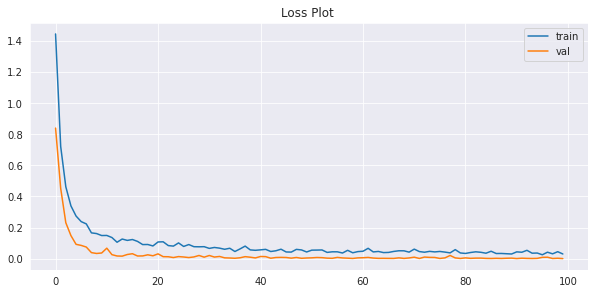

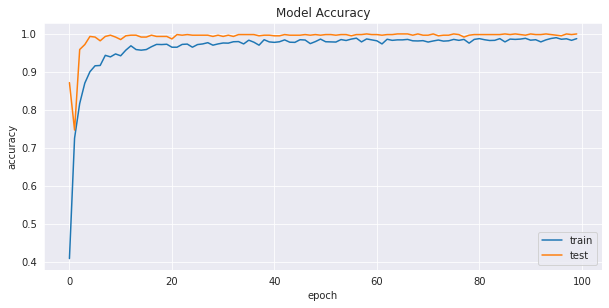

In [ ]:
# plot loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Loss Plot ')
# plt.plot(my_history['loss'], label='train')
plt.plot(history.history['loss'], label='train')
# plt.plot(my_history['val_loss'], label='val')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

# plot validation accuracy
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
# plt.plot(my_history['accuracy'])
plt.plot(history.history['accuracy'])
# plt.plot(my_history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [ ]:
def model_builder_hp(hp):
  model = keras.Sequential()
  # model.add(keras.layers.InputLayer(Dropout(0.4,input_shape=(13,))))
  # model.add(keras.layers.InputLayer(input_shape=(117)))
  model.add(Flatten(input_shape=X_train.shape[1:])) 
  # model.add(keras.layers.InputLayer.input_spec(Dropout(0.4, input_shape=(13,))))
  # model.add(keras.layers.InputLayer(input_shape=(13)))
  model.add(keras.layers.BatchNormalization())
  
  for i in range(hp.Int('num_layers', 2, 10)):
    # model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),min_value=4,max_value=64,step=4),kernel_constraint=maxnorm(3), activation=hp.Choice('act_'+str(i), values=['relu', 'tanh', 'sigmoid'], default='relu')))
    model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),min_value=13,max_value=210,step=4), activation=hp.Choice('act_'+str(i), values=['relu', 'tanh', 'sigmoid'], default='relu')))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))

  #for output layer
  model.add(keras.layers.Dense(6, activation='softmax')) 
  # model.add(Activation(tf.nn.sigmoid))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  # Select optimizer    
  optimizer=hp.Choice('optimizer', values=['adam', 'adagrad', 'SGD', 'RMSprop'])

  # Conditional for each optimizer
  if optimizer == 'adam':
    optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate)
  elif optimizer == 'adagrad':
    optimizer=keras.optimizers.Adagrad(learning_rate=hp_learning_rate)
  elif optimizer == 'SGD':
    optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate)
  elif optimizer == 'RMSprop':
    optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate)

  # Now compile your model with previous param
  model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(
    reduction="auto", name="sparse_categorical_crossentropy"
),metrics=['accuracy'])

  return model

In [ ]:
import shutil;
# shutil.rmtree('tuner_Dir') 
tuner = kt.Hyperband(model_builder_hp,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='tuner_Dir',
                     project_name='pose_Cnn_New')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X, y, epochs=100, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 00m 09s]
val_accuracy: 0.8530183434486389

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 04s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in tuner_Dir/pose_Cnn_New
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 125
act_0: sigmoid
dropout_1: 0.30000000000000004
units_1: 85
act_1: tanh
learning_rate: 0.01
optimizer: adagrad
units_2: 157
act_2: sigmoid
units_3: 173
act_3: sigmoid
units_4: 129
act_4: relu
units_5: 157
act_5: relu
units_6: 197
act_6: sigmoid
units_7: 189
act_7: sigmoid
units_8: 117
act_8: tanh
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
num_layers: 5
units_0: 193
act_0: relu
dropout_1: 0.2
units_1: 93
act_1: relu
learning_rate: 0.001
optimizer: RMSprop
units_2: 41
act_2: sigmoid
units_3: 113
act_3: sigmoid
units_4: 57
act_4: sigmoid
units_5: 29
act_5: relu
units_6: 145
act_6: relu
units_7: 121
act_7: sigmoid
units_8: 85
act_8: relu
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9763779640197754
Trial summary
Hyperparameters:
num_layers: 7
units_0: 141
act

In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 234)               0         
                                                                 
 batch_normalization_7 (Batc  (None, 234)              936       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 125)               29375     
                                                                 
 batch_normalization_8 (Batc  (None, 125)              500       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 125)               0         
                                                                 
 dense_8 (Dense)             (None, 85)               

In [ ]:
history = model.fit(X, y, epochs=500, validation_split=0.3)
# history = model.fit(X, y, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
84/84 [==============================] - 1s 16ms/step - loss: 0.0386 - accuracy: 0.9959 - val_loss: 0.0712 - val_accuracy: 0.9842
Epoch 2/500
84/84 [==============================] - 1s 11ms/step - loss: 0.0101 - accuracy: 0.9985 - val_loss: 0.0276 - val_accuracy: 0.9991
Epoch 3/500
84/84 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9996 - val_loss: 0.0226 - val_accuracy: 0.9991
Epoch 4/500
84/84 [==============================] - 1s 8ms/step - loss: 1.5409e-04 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 0.9991
Epoch 5/500
84/84 [==============================] - 1s 8ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 6/500
84/84 [==============================] - 1s 7ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 7/500
84/84 [==============================] - 1s 7ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.2386 - val_accuracy: 0.9282
Epoch 8